# Capstone Project

## Domain - Automobile

## Problem Statment
There is an automobile company XYZ from Japan which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Objectives:
You as a Data scientist are required to apply some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

## Data Dictionary
<ul style = "font-family: 'Segoe UI'; font-size: 16px;" >
        <li><strong>CarID:</strong> Identification Number for Each Car</li>
        <li><strong>SafetyRating:</strong> Car's Safety Rating</li>
        <li><strong>CarName:</strong> Name of the Car Model</li>
        <li><strong>FuelType:</strong> Type of Fuel Used (Gasoline, Diesel, Electric, etc.)</li>
        <li><strong>Aspiration:</strong> Type of Aspiration (Standard or Turbocharged)</li>
        <li><strong>NumDoors:</strong> Number of Doors on the Car</li>
        <li><strong>BodyStyle:</strong> Style of the Car's Body (Sedan, Coupe, SUV, etc.)</li>
        <li><strong>DriveWheelType:</strong> Type of Drive Wheels (Front, Rear, All)</li>
        <li><strong>EngineLocation:</strong> Location of the Car's Engine (Front or Rear)</li>
        <li><strong>Wheelbase:</strong> Length of the Car's Wheelbase</li>
        <li><strong>CarLength:</strong> Overall Length of the Car</li>
        <li><strong>CarWidth:</strong> Width of the Car</li>
        <li><strong>CarHeight:</strong> Height of the Car</li>
        <li><strong>CurbWeight:</strong> Weight of the Car without Passengers or Cargo</li>
        <li><strong>EngineType:</strong> Type of Engine (Gas, Diesel, Electric, etc.)</li>
        <li><strong>NumCylinders:</strong> Number of Cylinders in the Engine</li>
        <li><strong>EngineSize:</strong> Size of the Car's Engine</li>
        <li><strong>FuelSystem:</strong> Type of Fuel Delivery System</li>
        <li><strong>BoreRatio:</strong> Bore-to-Stroke Ratio of the Engine</li>
        <li><strong>Stroke:</strong> Stroke Length of the Engine</li>
        <li><strong>CompressionRatio:</strong> Compression Ratio of the Engine</li>
        <li><strong>Horsepower:</strong> Car's Engine Horsepower</li>
        <li><strong>PeakRPM:</strong> Engine's Peak RPM (Revolutions Per Minute)</li>
        <li><strong>CityMPG:</strong> Miles Per Gallon (MPG) in City Driving</li>
        <li><strong>HighwayMPG:</strong> MPG on the Highway</li>
        <li><strong>CarPrice:</strong> Price of the Car</li>
    </ul>
</div>


###  Import Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [114]:
dataset=pd.read_excel("Data Worksheet.xlsx")

### Exploratory Data Analysis (EDA)

In this i am performing EDA, So as to iteratively explore the data, identify data quality issues, and address them through preprocessing steps, ensuring that our analysis is based on clean and reliable data.

In [51]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
dataset.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [53]:
dataset.shape

(205, 26)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Insights:** <br>
   * No null values are there 
   * data types are also appropriate

In [55]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [56]:
dataset.duplicated().sum()

0

**Insight:** No duplicates are there

### Data Cleaning

**Removing unnecessary Columns & setting the index**

In [57]:
dataset.drop(columns=['car_ID'],inplace=True)
dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Checking Outliers

**Summary Statistics**

In [58]:
dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Insights from Statistics of the Dataset:
<ul>
   <li>
        <strong>Car Variety :</strong>
        <ul>
            <li>Dataset covers 205 car models, each unique in attributes.</li>
            <li>Sizes, weights, and engine capacities vary across all cars.</li>
        </ul>
    </li>
    
   <li>
        <strong>Price Range :</strong>
        <ul>
            <li>Minimum Price of the Car: 5,118 dollar</li>
            <li>Maximum Price of the Car: 45,400 dollar</li>
            <li>Average Price of the Car: 13,276 dollar.</li>
        </ul>
   </li>
   <li>
        <strong>Engine Diversity :</strong>
        <ul>
            <li>Engines differ in boreratio and stroke.</li>
            <li>Risk ratings symboling vary from -2 to 3.</li>
        </ul>
    </li>
<li>
        <strong>Data Distribution :</strong>
        <ul>
            <li>Features like carwidth, curbweight, enginesize show notable variability.</li>
            <li>Potential outliers present in compressionratio and horsepower.</li>
        </ul>
    </li>
</ol>


In [59]:
dataset['enginelocation'].unique().tolist()

['front', 'rear']

In [60]:
dataset.CarName.iloc[0]

'alfa-romero giulia'

In [61]:
dataset.CarName.iloc[0].split()

['alfa-romero', 'giulia']

In [62]:
dataset.CarName.iloc[0].split()[0]

'alfa-romero'

In [63]:
dataset['CarCompanyName'] = dataset['CarName'].apply(lambda x:x.split()[0])

In [64]:
dataset['CarCompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [65]:
dataset.groupby('CarCompanyName')['CarCompanyName'].agg('count')

CarCompanyName
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarCompanyName, dtype: int64

In [66]:
dataset.drop(columns=['CarName'],inplace=True)
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [67]:
dataset["CarCompanyName"].replace("alfa-romero","alfa-romeo", inplace=True)
dataset["CarCompanyName"].replace("maxda","mazda", inplace=True)
dataset["CarCompanyName"].replace("Nissan","nissan", inplace=True)
dataset["CarCompanyName"].replace("porcshce","porsche", inplace=True)
dataset["CarCompanyName"].replace("toyouta","toyota", inplace=True)
dataset["CarCompanyName"].replace("porcshce","porsche", inplace=True)
dataset["CarCompanyName"].replace("vokswagen","volkswagen", inplace=True)
dataset["CarCompanyName"].replace("vw","volkswagen", inplace=True)
dataset['CarCompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [68]:
dataset['CarCompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [69]:
dataset.to_excel('dataset.xlsx',index=False)

In [71]:
categorical_features = dataset.dtypes == object
list_categorical_features = dataset.columns[categorical_features].tolist()

In [72]:
list_categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompanyName']

In [73]:
dataset[list_categorical_features]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompanyName
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romeo
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [74]:
numerical_features = dataset.dtypes != object
list_numerical_features = dataset.columns[numerical_features].tolist()
list_numerical_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [75]:
dataset[list_numerical_features]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


### Distribution of Numerical Features

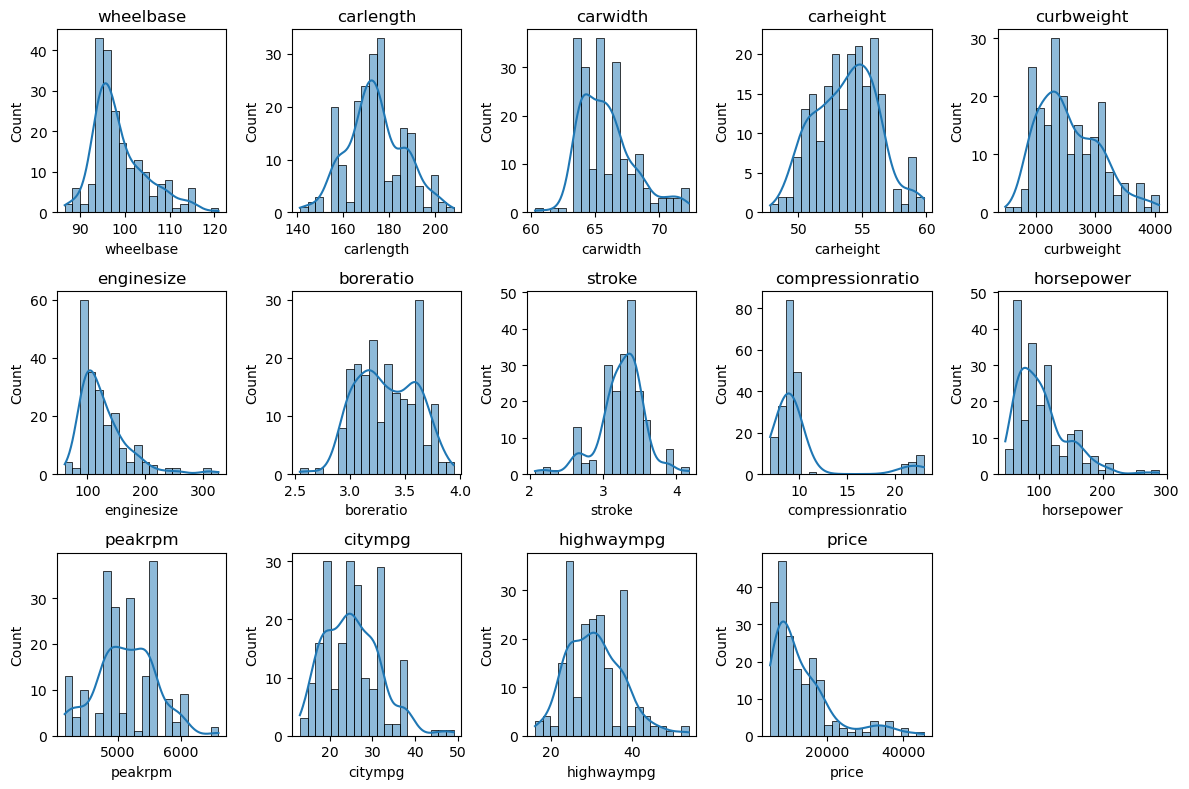

In [79]:
list_numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in list_numerical_features:
    plt.subplot(3, 5, list_numerical_features.index(feature) + 1)
    sns.histplot(data=dataset[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Correlation Analysis

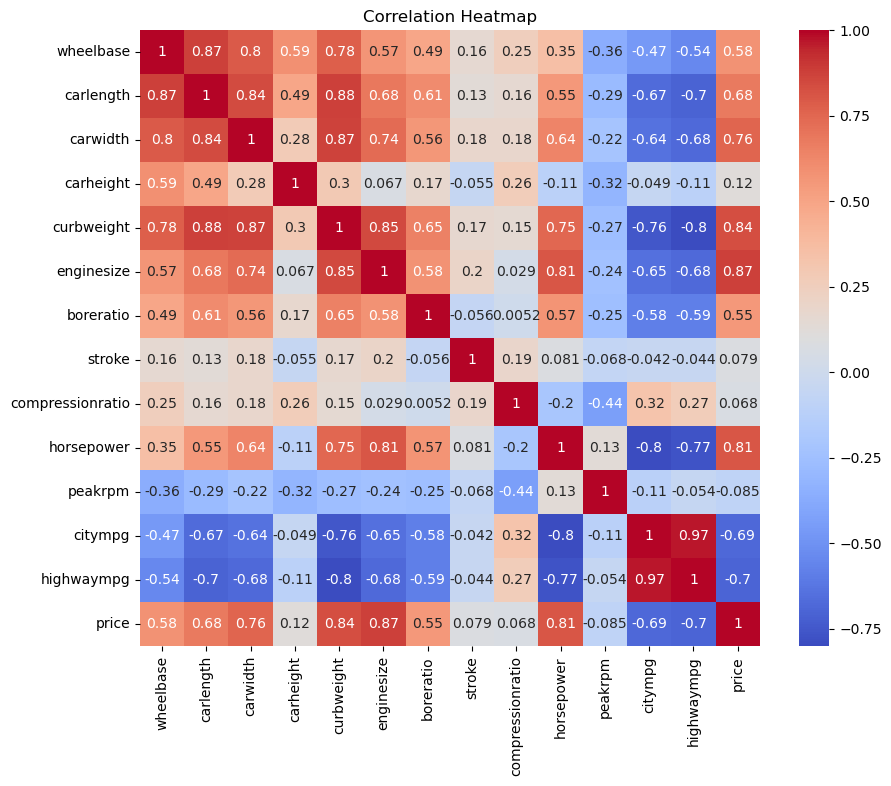

In [85]:
correlation_matrix = dataset[list_numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Drop Unwanted columns

dataset.drop(columns=['aspiration','doornumber','drivewheel','enginelocation','cylindernumber','fuelsystem','boreratio','stroke','compressionratio','enginesize'],inplace=True)
dataset.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,5500,24,30,13950.0,audi
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,5500,18,22,17450.0,audi


In [87]:
dataset.shape

(205, 15)

In [88]:
categorical_features1 = dataset.dtypes==object
list_categorical_features1 = dataset.columns[categorical_features1].tolist()
list_categorical_features1

['fueltype', 'carbody', 'enginetype', 'CarCompanyName']

In [89]:
numerical_features1 = dataset.dtypes!=object
list_numerical_features1 = dataset.columns[numerical_features1].tolist()
list_numerical_features1

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

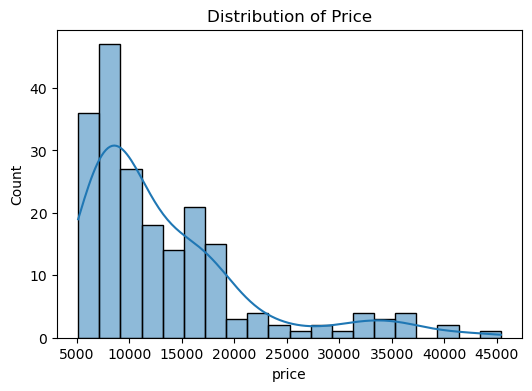

In [90]:
# Price Analysis
plt.figure(figsize=(6, 4))
sns.histplot(data=dataset['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

[]

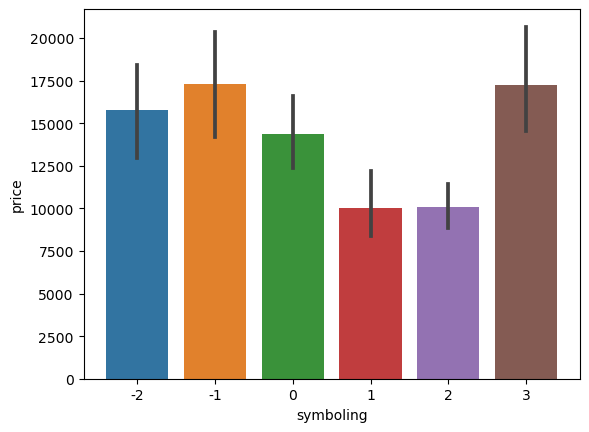

In [91]:
sns.barplot(x=dataset['symboling'],y=dataset['price'],data=dataset)
plt.plot()

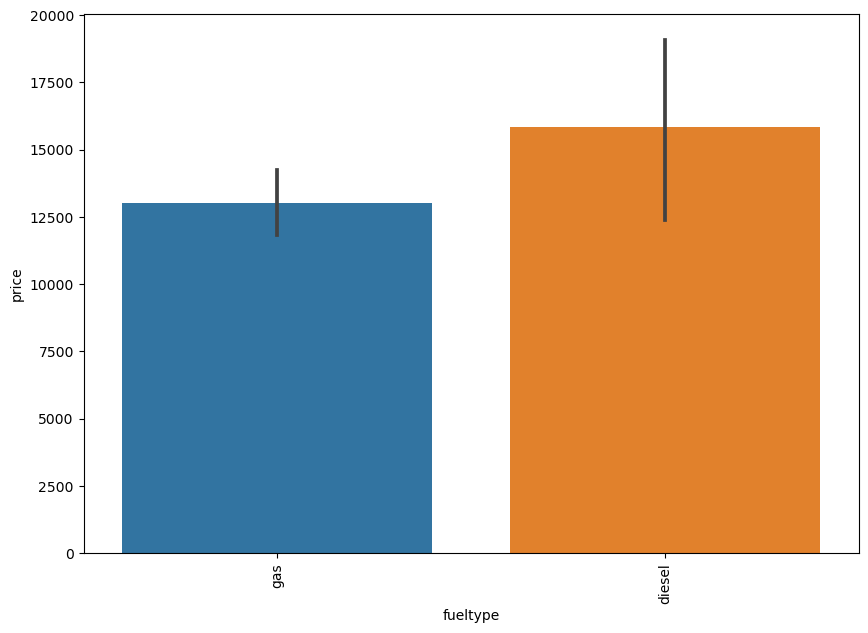

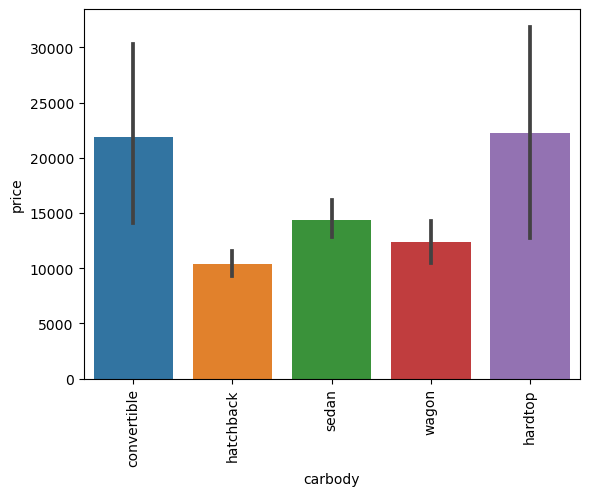

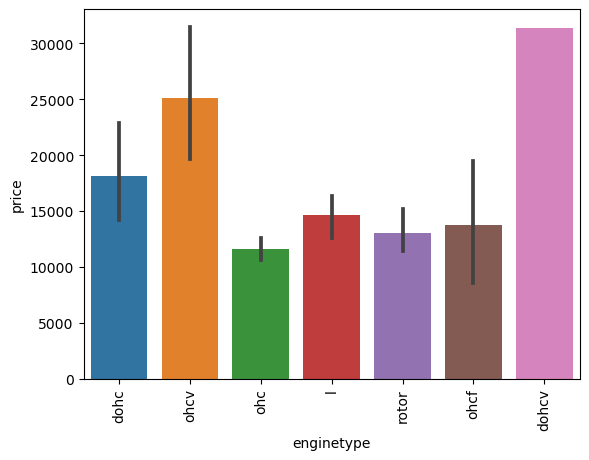

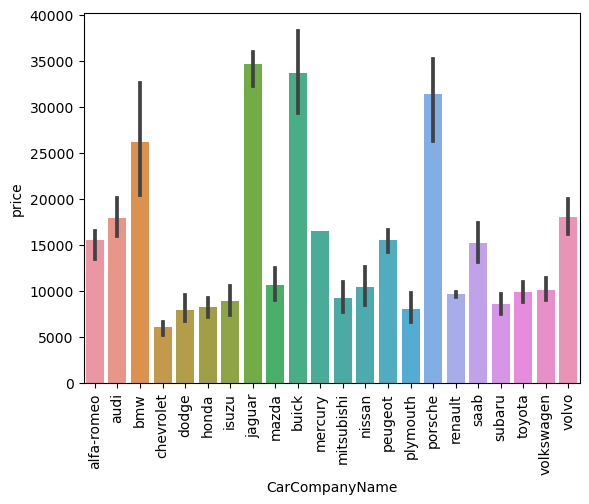

In [92]:
plt.figure(figsize=(10,7))
for col in list_categorical_features1:
    sns.barplot(x=dataset[col],y=dataset['price'],data=dataset)
    plt.xticks(rotation=90)
    plt.show()

In [93]:
dataset3 = dataset.copy()

In [94]:
dataset3.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,5500,24,30,13950.0,audi
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,5500,18,22,17450.0,audi


In [95]:
dummies = pd.get_dummies(dataset3[['fueltype','carbody','enginetype','CarCompanyName']])
dummies.head()

,fueltype_diesel,fueltype_gas,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
dataset4 = pd.concat([dataset3,dummies],axis=1)
dataset4.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,...,False,False,False,False,False,False,False,False,False,False
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,...,False,False,False,False,False,False,False,False,False,False
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,...,False,False,False,False,False,False,False,False,False,False
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,...,False,False,False,False,False,False,False,False,False,False
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,...,False,False,False,False,False,False,False,False,False,False


In [97]:
dataset4.drop(columns=['fueltype','carbody','enginetype','CarCompanyName'],axis=1,inplace=True)
dataset4.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,horsepower,peakrpm,citympg,highwaympg,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,154,5000,19,26,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,102,5500,24,30,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,115,5500,18,22,...,False,False,False,False,False,False,False,False,False,False


In [98]:
dataset4.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
wheelbase,88.6,88.6,94.5,99.8,99.4
carlength,168.8,168.8,171.2,176.6,176.6
carwidth,64.1,64.1,65.5,66.2,66.4
carheight,48.8,48.8,52.4,54.3,54.3
curbweight,2548,2548,2823,2337,2824
horsepower,111,111,154,102,115
peakrpm,5000,5000,5000,5500,5500
citympg,21,21,19,24,18
highwaympg,27,27,26,30,22


In [99]:
X = dataset4.drop(columns=['price'])
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,horsepower,peakrpm,citympg,highwaympg,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,154,5000,19,26,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,102,5500,24,30,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,115,5500,18,22,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,114,5400,23,28,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,160,5300,19,25,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,134,5500,18,23,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,106,4800,26,27,...,False,False,False,False,False,False,False,False,False,True


In [100]:
y = dataset4.price
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### Spliting the data

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Model Building

Will build 3 test model on the algorithms:
* Linear Regression
* Lasso
* Decision Tree

In [108]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
lr_clf.score(X_test,y_test)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

Mean squared error: 8342201.67
R-squared score: 0.84


In [109]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81364735, 0.88723086, 0.93755937, 0.86843285, 0.95286602])

In [110]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params': {
                'copy_X' : [True,False],
                'fit_intercept' : [True,False],
                'n_jobs': [None,1,2,4],
                'positive': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params' :{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree' :{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.891947,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.880339,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.836992,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [111]:
def predict_price(CarCompanyName, enginetype, carbody, fueltype, highwaympg, citympg, peakrpm, horsepower, curbweight, carheight, carwidth, carlength, wheelbase, symboling, X, lr_clf):
    # Find the indices of the categorical variables
    CarCompanyName_index = np.where(X.columns == 'CarCompanyName_' + CarCompanyName)[0][0]
    enginetype_index = np.where(X.columns == 'enginetype_' + enginetype)[0][0]
    carbody_index = np.where(X.columns == 'carbody_' + carbody)[0][0]
    fueltype_index = np.where(X.columns == 'fueltype_' + fueltype)[0][0]

    # Create feature vector
    x = np.zeros(len(X.columns))
    x[0] = symboling
    x[1] = wheelbase
    x[2] = carlength
    x[3] = carwidth
    x[4] = carheight
    x[5] = curbweight
    x[6] = horsepower
    x[7] = peakrpm
    x[8] = citympg
    x[9] = highwaympg
    
    # Set categorical variable indices to 1
    if CarCompanyName_index >= 0:
        x[CarCompanyName_index] = 1
    if enginetype_index >= 0:
        x[enginetype_index] = 1
    if carbody_index >= 0:
        x[carbody_index] = 1
    if fueltype_index >= 0:
        x[fueltype_index] = 1

  
    return lr_clf.predict([x])[0]

In [112]:
predicted_price = predict_price('audi', 'dohc', 'convertible', 'gas', 27, 21, 5000, 111, 2548, 48.8, 64.1, 168.8, 88.6, 3, X, lr_clf)
print("Predicted price:", predicted_price)

Predicted price: 12973.165985648455
